<h1>Algunos de los conceptos Matematicos involucrados<h1/>

Tenemos el sig sistema de ecuaciones =
$
\left\{\begin{matrix}
a_{11}x_{1} & + & & a_{12}x_{2}  & + & ... & + & a_{1n}x_{n} & = & b_{1}& \\ 
a_{21}x_{1} & + & & a_{22}x_{2}  & + & ... & + & a_{2n}x_{n} & = & b_{2}& \\ 
\vdots & \vdots & & \vdots  & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots&\\ 
a_{m1}x_{1} & + & & a_{m2}x_{2}  & + & ... & + & a_{mn}x_{n} & = & b_{m}&
\end{matrix}\right.
$

$\Rightarrow$ podemos expresarlo matricialmente como: $Ax = b$ con: 
* $A \in \mathbb{R^{m\times n}}$, 
* $x \in \mathbb{R^{n}}$ y $b \in \mathbb{R^{m}} $ 
* $m < n$

<br/>

$Definicion$

**Solucion basica**: Dado un conjunto de $m$ ecuaciones lineales con $n$ incognitas, se llamara **base** a cualquier submatriz $B$, $m \times m$ de $A$, no singular, **formada por m columnas independientes de $A$.**

Sea $N$ la submatriz $m \times (n-m)$ de $A$, fromada por las columnas restantes.

$\therefore$ podemos escribir $A$ particionada $ie$ $A = \left [B | N \right]$ y $ x = 
\begin{bmatrix}
x_{B}\\ 
x_{N}
\end{bmatrix}
$ $\Rightarrow$  $\left [B | N \right] * \begin{bmatrix}
x_{B}\\ 
x_{N}
\end{bmatrix} = Bx_{B} + Nx_{N} = b $

luego $x_{B} = B^{-1}b-B^{-1}Nx_{N}$.

si $x = (x_{B}, x_{N}) = (B^{-1}b-B^{-1}Nx_{N},  x_{N})  : x_{N} = 0$ es llamada **solucion basica** con respecto a la base $B$, las componentes de $x_{B}$ son llamadas **componentes basicas** de $x$ y las componentes de $x_{N}$ son llamadas **componentes no basicas** de $x$ 

<br/>

$Definicion$

**Region factible:** Denotaremos por $\Omega$ al conjunto que satisface las restricciones de un problema de PL. 

$\Omega$ tendra el **nombre de region factible.**

$\therefore \Omega = \left \{ x|Ax=b, x \geq 0  \right \}$

<br/>

$Definicion$

**Solucion basica factible:** Una solucion $x$ que pertenece al conjunto $\Omega$ **se dice factible para el sistema**. Si ademas esa solucion $x$ es basica $\Rightarrow$ se llama **solucion basica factible**.

<br/>

$Definicion$

**Solucion basica factible optima:** Sera la solucion basica factible que da el valor optimo para la funcion objetivo.

<br/>

$Teorema $

**Teorema Fundamental de Programacion Lineal:**

Dado un problema de PL en forma estandar, donde $A \in \mathbb{R^{m\times n}}$, tiene rango $m$ luego:

$i$) si $\exists$ una solucion factible $\Rightarrow$ $\exists$ una solucion basica factible.

$ii$) si $\exists$ una solucion factible optima $\Rightarrow$ $\exists$ una solucion basica factible optima.

<br/>

$Teorema $

Sea $\Omega$ la región factible. 
Un vector $x$ es un punto extremo de $\Omega \Leftrightarrow$ es una solución básica factible de $\Omega$.

<br/>

$Corolario$

Si $\exists$ una solución óptima de un problema de programación lineal $\Rightarrow$ $\exists$ una solución óptima finita que es un punto extremo de $\Omega$.

-----

<h1>IDEA DEL PROCEDIMIENTO:<h1/>

Si encontramos las soluciones basicas factibles de $\Omega \Rightarrow$  dichas soluciones seran los puntos extremos de $\Omega$ por el Teorema $\therefore$ si $\exists$ una solucion optima $\Rightarrow$ dicha solucion sera alguno de los puntos extremos de $\Omega$.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# Ejercicio 1

<h2>Una persona debe comprar fertilizantes (abono) para sus campos. Le informaron que cada kilogramo de fertilizante le alcanza para 10m2 de su campo, y debido a las caracterısticas propias de esas tierras, el fertilizante debe contener (al menos): 3g de fosforo (P), 1.5g de nitrogeno (N) y 4g de potasio (K) por cada 10m2. En el mercado existen 2 tipos de fertilizantes: T1 y T2. El fertilizante T1 contiene 3g de P, 1g de N y 8g de K y cuesta $\$$10 por kilogramo. En cambio, el fertilizante T2 contiene 2g de P, 3g de N y 2g de K y cuesta $\$$8 por kilogramo. ¿cuantos kilogramos de cada fertilizante se debe comprar, por cada 10m2 de campo, de modo de minimizar el costo total, cubriendo los requerimientos
de su suelo?. 
Graficar la region factible para el problema.
<h2/>

Procedemos a modelar el problema

<br/>

En resumen:

|Componente| Cantidad de Fertilizante T1| Cantidad de Fertilizante T2 |
|----|----|-----|
|Potasio| 8g|2g|
|Fosforo|3g|2g|
|Nitrogeno|1g|3g|
|**Precio**|$\$$10|$\$$8|



El fertilizante debe contener (al menos): 
* 3g de fosforo (P). 
* 1.5g de nitrogeno (N). 
* 4g de potasio (K) por cada 10m2.

$\therefore$ tenemos las siguientes desigualdades que se corresponden a nuestra region factible $\Omega$.

<br/>

<h2>
$\left\{\begin{matrix}
 &  8*T_{1} + 2*T_{2} \geqslant 4 (K)   & \\ 
 & 3*T_{1} + 2*T_{2} \geqslant 3 (P) & \\ 
 & 1*T_{1} + 3*T_{2} \geqslant 1.5 (N) & 
\end{matrix}\right.
$ 
<h2/>
o 
<h2>
$\left\{\begin{matrix}
 &  -8*T_{1} - 2*T_{2} \leq   -4 (K)   & \\ 
 & -3*T_{1} - 2*T_{2} \leq  -3 (P) & \\ 
 & -1*T_{1} - 3*T_{2} \leq  -1.5 (N) & 
\end{matrix}\right.
$ 
<h2/>


Ahora procedemos a introducir los coeff que acompanana a las variables $T_{1}$ y $T_{2}$ en una matriz que es lo que esperara el **metodo simplex de scipy** para hallar la solucion.

$\Rightarrow$ Nuestra matriz quedaria:

<h2>
$A=
\begin{pmatrix}
 -8 & -2\\ 
-3 & -2\\ 
 -1 & -3
\end{pmatrix}
$
<h2/>
Y ademas
<h2>
$B=
\begin{pmatrix}
-4\\ 
-3\\ 
-1.5
\end{pmatrix}
$
<h2/>

Por otro lado, estamos interesados en minimizar el costo total en fertilizantes $\therefore$ nuestra funcion a minimizar es $C= f(x)= 10*T_{1} + 8*T_{2}$



Ahora como este problema es de 2 dimensiones $\therefore$ vamos a poder graficar la region factible, la cual sera las intersecciones de cada una de las restricciones.

In [2]:
c = np.array([10.,8])
A_ub = np.array([
                [-8, -2],
                [-3, -2],
                [-1, -3]
                ]
                )
b_ub =np.array([-4, -3, -1.5])

solucion = optimize.linprog(c, A_ub, b_ub)


print(f"Este es el resultado {solucion}")

x = np.linspace(0, 2)

#corresponde a las condiciones
cond_p = -1.5 * x + 1.5
cond_n = -1/3 * x + 0.5
cond_k = -4 * x + 2

#Esto es una cota, para que quede lindo nomas
y2 = 4

Este es el resultado      con: array([], dtype=float64)
     fun: 10.285714286964714
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([3.28571429e+00, 2.57661448e-10, 7.71110953e-10])
  status: 0
 success: True
       x: array([0.85714286, 0.21428571])


Dicha region corresponde a la restriccion de fosforo.

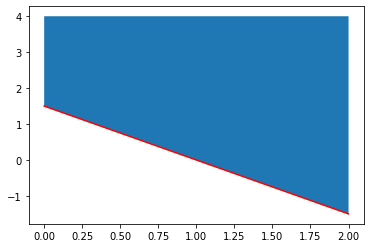

In [13]:
plt.plot(x, cond_p, color="red")
plt.fill_between(x, cond_p, y2)
plt.show()

Dicha region corresponde a la restriccion de nitrogeno.

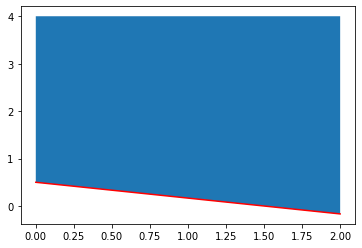

In [12]:
plt.plot(x, cond_n, color="red")
plt.fill_between(x, cond_n, y2)
plt.show()

Dicha region corresponde a la restriccion de potasio.

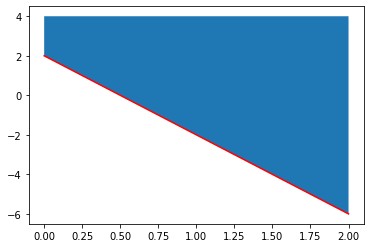

In [11]:
plt.plot(x, cond_k, color="red")
plt.fill_between(x, cond_k, y2)
plt.show()

$\therefore$ La interseccion de todas las restricciones resulta en la siguiente region factible:

Y como nuestra solucion optima factible se encuentra en los vertices $\Rightarrow$ dicha solucion basica factible sera alguno de los vertices, podemos corroborarlo:

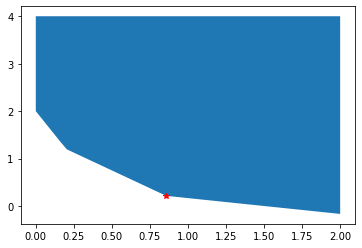

In [19]:
max_restriccion = np.maximum(cond_p, cond_n)
max_restriccion = np.maximum(max_restriccion, cond_k)
plt.plot(solucion.x[0], solucion.x[1], "*", color="red")
plt.fill_between(x, max_restriccion, y2)
plt.show()

Podemos ver los valores de cto deberiamos comprar de fertilizante $T_{1}$ y $T_{2}$ en el atributo x, tmb podemos ver cual es el valor de nuestra funcion objetivo en el atributo fun.

In [21]:
solucion

     con: array([], dtype=float64)
     fun: 10.285714286964714
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([3.28571429e+00, 2.57661448e-10, 7.71110953e-10])
  status: 0
 success: True
       x: array([0.85714286, 0.21428571])

# Ejercicio 2

Transporte de mercaderıa. Una empresa cosechadora y proveedora de mani debe llevar su produccion (almacenada en 100 molinos) a sus clientes (100 locales diferentes). En la matriz del archivo costos.dat, el elemento i, j representa el costo de enviar la produccion desde el deposito i al cliente j. El vector en stock.dat representa el stock en cada deposito y los elementos de demanda.dat indican la demanda de cada cliente. Minimizar el costo de transportar el producto de los depositos a los clientes, sujeto al stock de cada deposito,
para poder satisfacer la demanda de cada cliente.


$min \sum_{i,j}c_{ij}x_{ij}$

$\sum_{j}x_{ij} \leq s_{i} \forall i$

$\sum_{i}x_{ij} \ge d_{j} \forall j$

$x_{ij} \ge 0 \forall  i,j $




In [22]:
# cargo desde el disco los datos
from google.colab import files
uploaded = files.upload()

Saving costos.dat to costos.dat
Saving demanda.dat to demanda.dat
Saving stock.dat to stock.dat


In [33]:
datos_costos = np.loadtxt("./costos.dat")
datos_stock = np.loadtxt("./stock.dat")
datos_demanda = np.loadtxt("./demanda.dat")
#b_ub = np.hstack([datos_stock, datos_demanda])

In [34]:
display(datos_costos.shape, datos_stock.shape, datos_demanda.shape)

(100, 100)

(100,)

(100,)

In [41]:
# x[0,0] --> c[0]
# x[0,1] --> c[1]
# x[1,1] --> c[2]
# ...
# x[100,100] -->c[10000] 
c = datos_costos.flatten()

# b_ub
b_ub = np.hstack([datos_stock, - datos_demanda]) 

# A_ub

# stock
# sum_j x_{i,j} <= s_1
# c[0]+ c[1] + c[100]

# => A_s * y <=s
# A_s.shape = (100, 10000)
#        1 2 ... 100 101 102 ... 200 201 ... 10000
# 1      1 1 ... 1   0   0   ...  0   0  ... 0
# 2      0 0 ... 0   1   1   ...  1   0  ... 0
# ...
# 100    0 0 ... 0   0   0   ...  0   0  ... 1

A_s = np.zeros((100, 10000))

for i in range(100):
  A_s[i,(i*100):((i+1)*100)] = np.ones(100)


# demanda
# sum_i x_{i,1} >= d_j
# x[1,1] + x[2,1] + ... + x[100,1] >= d_1
# y[1]   + c[101] + ... + c[9901] >= d_1
# => A_d * y >= d
# A_d.shape = (100, 10000)
#        1 2 ... 100 101 102 ... 200 201 ... 10000
# 1      1 0 ... 0   1   0   ...  0   1  ... 0
# 2      0 1 ... 0   0   1   ...  0   0  ... 0
# ...
# 100    0 0 ... 1   0   0   ...  1   0  ... 1
A_d = np.hstack([np.eye(100) for _ in range(100)])

A_ub = np.vstack([A_s, -A_d])


sol = optimize.linprog(c, A_ub=A_ub, b_ub=b_ub )
#sol
sol

     con: array([], dtype=float64)
     fun: 25436930.496518314
 message: 'Optimization terminated successfully.'
     nit: 16
   slack: array([ 5.81677264e-05,  3.88165190e+02,  4.95410445e-05,  4.63975784e-05,
        5.28855776e-05,  1.15298568e+02,  3.84824195e-05,  5.90861255e-05,
        5.24949819e-05,  5.64052775e-05,  6.12360741e-05,  5.97868211e-05,
        4.89710078e-05,  7.85204866e-05,  5.62826494e-05,  9.41116142e+02,
        2.06770413e+03,  4.86821687e-05,  4.35599341e-05,  4.79953815e-05,
        4.69809370e-05,  5.55358629e-05,  4.55977820e-05,  3.99729174e-05,
        6.14569058e-05,  1.56813331e+03,  6.97096798e-05,  7.32743761e-05,
        6.02900691e-05,  5.49710876e-05,  6.69093361e-05,  5.58418615e-05,
        4.69616375e-05,  6.88591122e-05,  2.77485071e+03,  2.17805571e+03,
        6.15315253e-05,  4.81787422e+02,  7.35231447e-05,  1.78567052e+03,
        2.31122777e+02,  5.79009647e-05,  6.56336751e+02,  6.69676601e-05,
        5.22008886e-05,  4.99813041e-0

$\Rightarrow$ 
* i representa el deposito, 
* j representa el cliente,
* x[i,j] representa las cantidades que se llevarian del deposito i al cliente j.

In [46]:
x = sol.x

x = x.reshape(100,100)

idx, idy = np.where(np.round(x))

for i, j in zip(idx,idy):
  print(i,j,x[i,j])

0 0 790.2107494388056
0 64 2213.5136315360046
1 22 290.42580987472
1 50 1759.4886111654528
2 41 2180.4226002375312
2 56 472.3729413179332
3 26 2409.571680962833
4 36 850.7491482562519
4 91 1938.0820983101592
5 19 2519.8081317148935
6 51 2044.4348057318846
7 98 362.7831283122287
7 99 2775.966587102926
8 20 547.3043829722151
8 89 2099.0624916430884
9 70 236.41277970544104
9 71 2581.7099693800387
10 53 868.7357215296342
10 92 2368.0843083567174
11 4 3206.4161063552233
12 17 186.66881407643464
12 65 2399.9433617342
13 22 937.1535506764418
13 35 253.41196135366735
13 97 2853.6176661857876
14 45 2629.509968972226
14 49 389.74467441119396
15 33 2165.542599397592
16 6 260.0504045240782
16 26 50.59211956522117
17 1 313.6024606595924
17 16 295.41854193251845
17 72 1947.5375089610156
18 53 1727.6567952778225
18 78 440.7444100412736
19 43 716.8105808980395
19 78 1754.24925362326
20 20 507.9940447074954
20 86 2027.4082225644897
21 27 460.5957367098751
21 75 2448.633787713415
22 70 1370.628703817254

(array([ 0,  0,  1,  1,  2,  2,  3,  4,  4,  5,  6,  7,  7,  8,  8,  9,  9,
        10, 10, 11, 12, 12, 13, 13, 13, 14, 14, 15, 16, 16, 17, 17, 17, 18,
        18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 24, 24, 25, 25, 26, 26, 27,
        27, 28, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 36, 36, 37,
        38, 38, 39, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 45, 46, 46,
        47, 47, 48, 48, 49, 49, 50, 50, 51, 51, 52, 53, 54, 54, 56, 56, 57,
        57, 58, 58, 59, 59, 60, 61, 62, 63, 63, 64, 64, 65, 65, 67, 67, 68,
        68, 69, 69, 70, 70, 71, 71, 73, 75, 75, 76, 76, 76, 77, 77, 78, 78,
        79, 79, 79, 80, 80, 81, 81, 81, 82, 82, 82, 83, 83, 84, 85, 86, 87,
        88, 89, 89, 90, 90, 92, 92, 93, 93, 93, 94, 94, 95, 95, 96, 96, 96,
        98, 98, 99, 99]),
 array([ 0, 64, 22, 50, 41, 56, 26, 36, 91, 19, 51, 98, 99, 20, 89, 70, 71,
        53, 92,  4, 17, 65, 22, 35, 97, 45, 49, 33,  6, 26,  1, 16, 72, 53,
        78, 43, 78, 20, 86, 27, 75, 70, 98, 31, 48, 56, 65, 73